In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

In [3]:
import causality as intest
import viz

In [13]:
target = 1 # By defaul X->Y
nb_samples = 100

Nx = {
    'name': 'exp',
    'var': 5
}

Ny = {
    'name': 'normal',
    'var': 1
}


f = lambda x: 10*np.tanh(x) + 4*np.sin(x)+ x + x ** 2 + .1 *x**3

In [14]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y

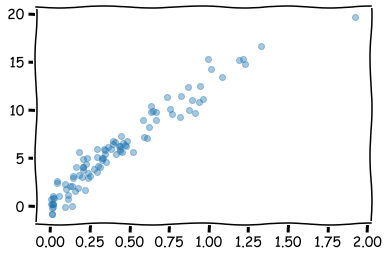

In [15]:
with plt.xkcd():
    viz.pretty_scatter(x, y)

In [7]:
X_, Y_, _ = intest.partition_data(x, y)

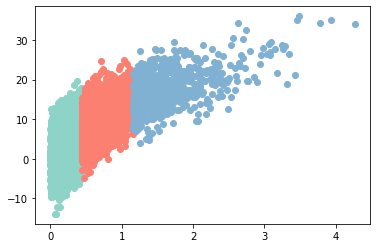

In [8]:
viz.plot_scatters(X_, Y_)

In [9]:
residuals, X_, Y_, models = intest.estimate_partitioned_models(x, y)
score, pairs = intest.find_max_discrp(residuals)

In [10]:
score

0.09832749243136518

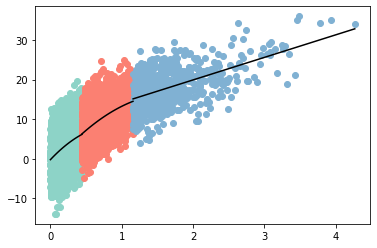

In [11]:
viz.plot_models(X_, Y_, models)

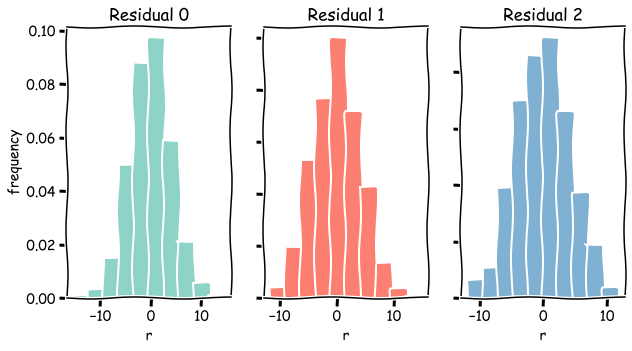

In [12]:
with plt.xkcd():
    viz.plot_residuals(residuals)

In [13]:
X_r, Y_r, _ = intest.partition_data(y, x)

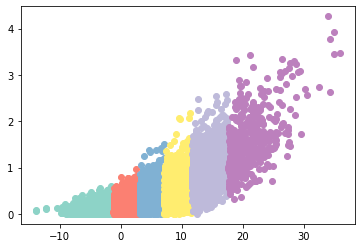

In [14]:
viz.plot_scatters(X_r, Y_r)

In [15]:
residualsr, Y_r, X_r, modelsr = intest.estimate_partitioned_models(y, x)
scorer, pairsr = intest.find_max_discrp(residualsr)

In [16]:
scorer

1.119986671513389

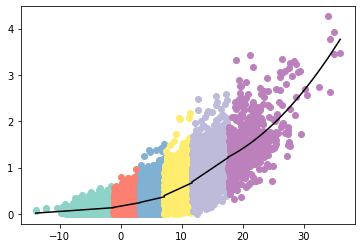

In [17]:
viz.plot_models(Y_r, X_r, modelsr)

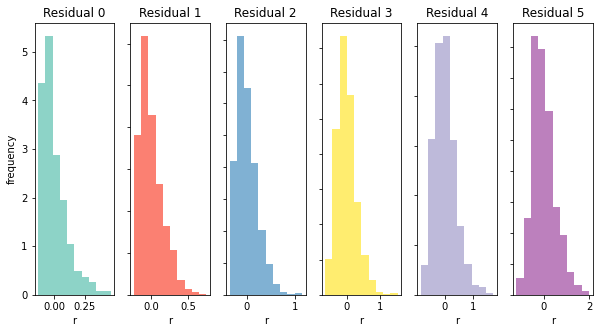

In [18]:
viz.plot_residuals(residualsr)

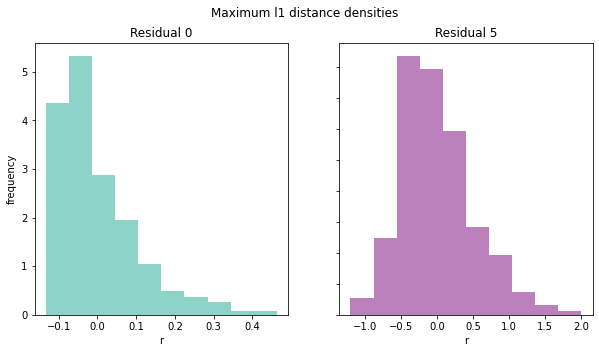

In [19]:
viz.plot_residuals(residualsr, res_filter=pairsr, title='Maximum l1 distance densities')

In [20]:
print('X -> Y', score)

X -> Y 0.09832749243136518


In [21]:
print('X <- Y', scorer)

X <- Y 1.119986671513389


In [22]:
# avg dist to avg
# can use models to easily compute an estimate cheaply (add point and degree-> regress)
# var / moment est for low sample regime

# discretise based on largest support (min, max) , see hist param

In [23]:
print('predicted:', int(score < scorer))

predicted: 1


In [24]:
print('Truth:', target)

Truth: 1


In [147]:
def plot_xkcd_hist(res, c_idx=0, save_name=None):
    with plt.xkcd():
        plt.hist(res, density=True, color=viz.color_map(c_idx))
        plt.xticks([])
        plt.yticks([])
#         plt.xlabel('xlabel', fontsize=18)
#         plt.ylabel('ylabel', fontsize=16)
        if save_name:
            plt.savefig(save_name)

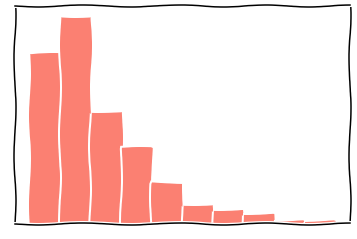

In [148]:
res = residualsr[0]
plot_xkcd_hist(res, c_idx=1, save_name='red_histo')

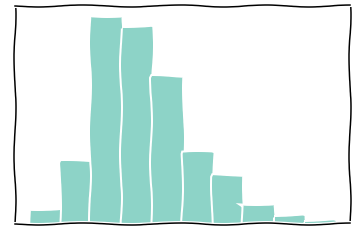

In [149]:
res = residualsr[5]
plot_xkcd_hist(res, c_idx=0, save_name='other_histo')

In [183]:
def plot_xkcd_scatter(arr, c_idx=0, marker='x', markersize=15, save_name=None):
    with plt.xkcd():
        plt.plot(arr, np.zeros_like(arr), marker, markersize=markersize, color=viz.color_map(c_idx))
        plt.xticks([])
        plt.yticks([])
        
        if save_name:
            plt.savefig(save_name)

In [184]:
cap = 10

In [185]:
marker_list = ["*", "o", "v", "P", "X", "d", "D"]

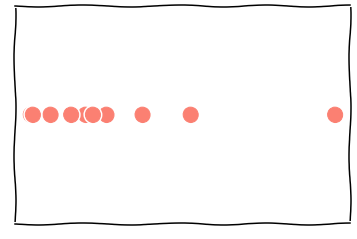

In [186]:
res = residualsr[0][:cap]
plot_xkcd_scatter(res, c_idx=1, marker=marker_list[1], save_name='p_scatter')

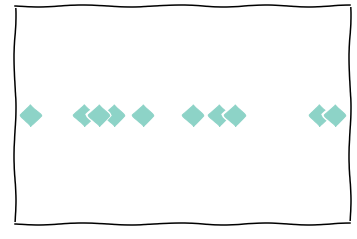

In [187]:
res = residualsr[5][:cap]
plot_xkcd_scatter(res, c_idx=0, marker=marker_list[6], save_name='q_scatter')

In [108]:
from sklearn.metrics.pairwise import rbf_kernel

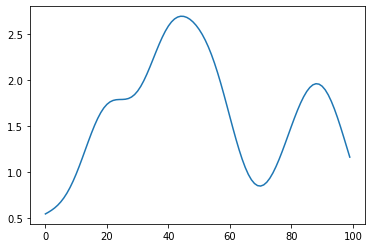

In [121]:
K = rbf_kernel(x.reshape(-1, 1), gamma=.1)
m = np.zeros(x.shape)
y = np.random.multivariate_normal(m, K)
plt.plot(y)

In [251]:
def plot_hr_data(data_hr):
    with plt.xkcd():
        linewidth = 4
        plt.plot(data_hr['hr'], c=viz.color_map(1), linewidth=linewidth, label='HR')
        plt.plot(data_hr['bp'], c=viz.color_map(2), linewidth=linewidth, label='BP')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('time')
        plt.ylaebel('')
        plt.legend()
        plt.savefig('correlated_hr')

In [252]:
np.save("data_hr.npy", data_hr)
data_hr = np.load("data_hr.npy", allow_pickle=True)
data_hr = data_hr.item()

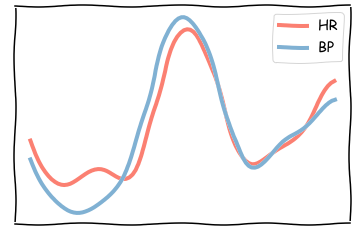

In [253]:
plot_hr_data(data_hr['corr'])

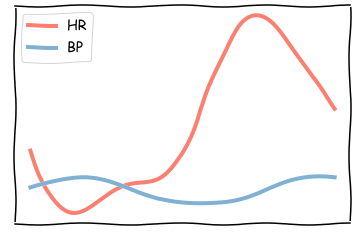

In [254]:
plot_hr_data(data_hr['uncorr'])